In [1]:
import pqr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
prices = pd.read_csv("./data/moex_prices.csv", index_col="Date", parse_dates=True)
prices.tail()

,ABRD,ACKO,AESL,AFKS,AFLT,AKHA,AKRN,ALBK,ALNU,ALRS,...,TCSG,VKCO,AGRO,QIWI,FIVE.1,POLY,YNDX,POGR,VEON-RX,RAVN
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-07,183.5,NaN,NaN,13.622,37.58,NaN,20910.0,NaN,NaN,92.80,...,3470.0,492.0,1001.2,442.0,1275.5,904.6,2130.0,12.300,83.60,NaN
2022-04-08,180.0,NaN,NaN,13.213,36.94,NaN,20160.0,NaN,NaN,82.53,...,3274.5,497.8,1006.0,432.5,1257.0,904.1,2115.0,11.855,82.55,NaN
2022-04-11,178.0,NaN,NaN,13.200,35.46,NaN,19676.0,NaN,NaN,79.55,...,3269.0,488.0,1003.2,430.0,1234.0,925.0,2097.0,12.430,82.50,NaN
2022-04-12,175.5,NaN,NaN,13.044,34.06,NaN,19298.0,NaN,NaN,78.46,...,3217.0,468.8,993.6,414.5,1187.0,936.7,2074.0,12.210,80.80,NaN
2022-04-13,177.5,NaN,NaN,13.200,33.86,NaN,19750.0,NaN,NaN,79.95,...,3172.0,466.8,955.0,412.5,1148.0,918.7,2088.0,12.110,75.00,NaN


In [3]:
momentum = pqr.compose(
    # picking
    pqr.freeze(pqr.filter, universe=prices > 10),
    pqr.freeze(pqr.look_back, period=20, agg="pct"),
    pqr.freeze(pqr.lag, period=1),
    pqr.freeze(pqr.hold, period=20),
    pqr.freeze(pqr.quantiles, min_q=0.7, max_q=1),
    # allocation
    pqr.ew,
    # evaluation
    pqr.freeze(pqr.evaluate, universe_returns=pqr.to_returns(prices)),
)

returns = momentum(prices)

In [4]:
dummy_benchmark = pqr.compose(
    pqr.freeze(pqr.filter, universe=prices > 10),
    lambda x: x.notnull(),  # pick all available to buy
    pqr.ew,
    pqr.freeze(pqr.evaluate, universe_returns=pqr.to_returns(prices)),
)

benchmark_returns = dummy_benchmark(prices)

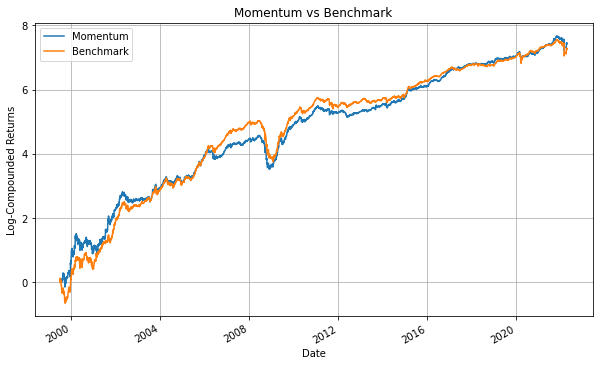

In [5]:
def log_compounded(r: pd.Series) -> pd.Series:
    compounded = (1 + r).cumprod()
    return np.log(compounded)


plt.figure(figsize=(10, 6))

log_compounded(returns).plot(label="Momentum")
log_compounded(benchmark_returns).plot(label="Benchmark")

plt.title("Momentum vs Benchmark")
plt.xlabel("Date")
plt.ylabel("Log-Compounded Returns")
plt.grid()
plt.legend();